# Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [15]:
import sys
import os
# add woodpecker library to PYTHONPATH
sys.path.append(f"{os.getcwd()}/..")

In [16]:
import numpy as np
from random import randint
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
import graphviz
from graphviz import Source

from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

from woodpecker.sklearn.decisiontree.decision_tree_structure_regressor import DecisionTreeStructureRegressor


# Load dataset

In [17]:
dataset = pd.read_csv("../resources/dataset/train_titanic.csv")

# Feature enginner

In [18]:
# Age
dataset["Age_na"] = dataset["Age"].isna().astype(int)
dataset.fillna({"Age":dataset.median()["Age"]}, inplace=True)

#Sex
dataset["Sex_label"] = dataset["Sex"].astype("category").cat.codes

#Cabin
dataset["Cabin_label"] = dataset["Cabin"].astype("category").cat.codes

# Embarked
dataset["Embarked_label"] = dataset["Embarked"].astype("category").cat.codes

# Select features and target variables

In [19]:
features = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
target = "Age"

# Train/validation split

In [20]:
random_state = 1987
train, valid = train_test_split(dataset, test_size = 0.2, stratify = dataset.Survived, random_state=random_state)

# Train model

In [30]:
max_depth = 3
model = DecisionTreeRegressor(criterion="mae", max_depth=max_depth)
_ = model.fit(train[features], train[target])

# Validation

In [31]:
mean_absolute_error(valid[target], model.predict(valid[features]))

9.506983240223464

# Model interpretation

In [32]:
dts = DecisionTreeStructureRegressor(model, train, features, target)

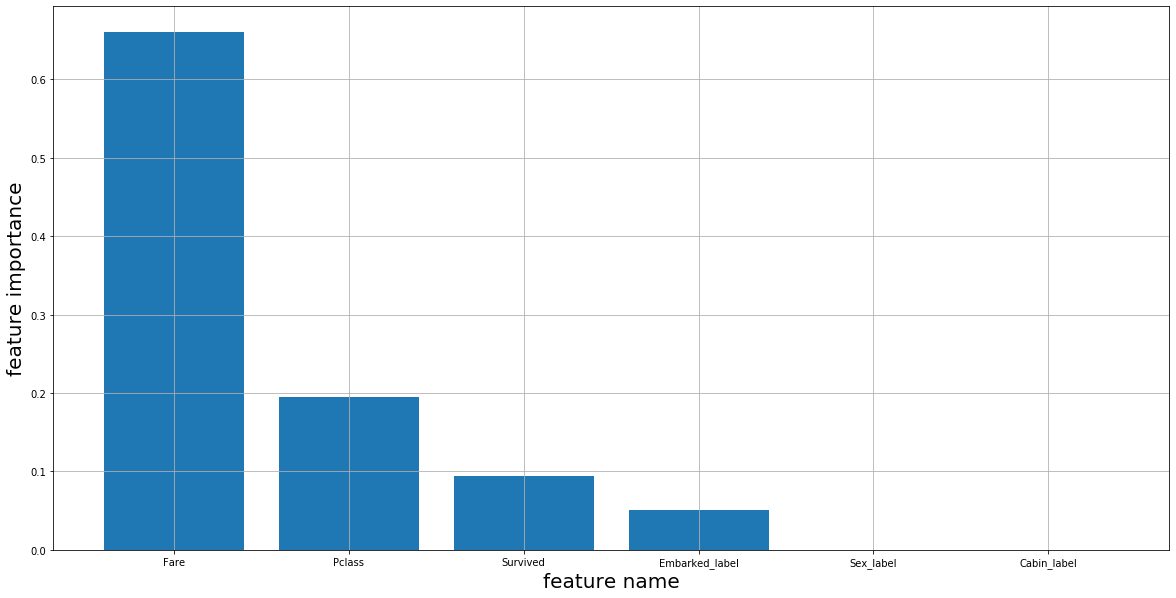

In [33]:
dts.show_features_importance()

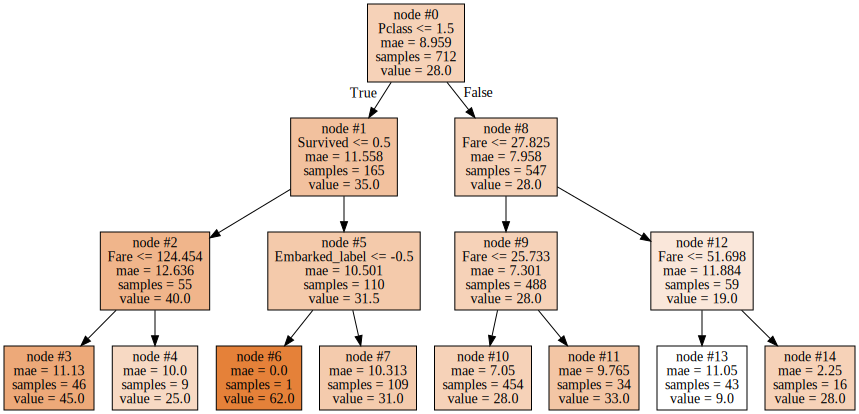

In [34]:
dts.show_decision_tree_structure(rotate=False)

In [35]:
print(f"Node count {dts.get_node_count()}, leaf count {dts.get_leaf_node_count()}, split count {dts.get_split_node_count()} ")

Node count 15, leaf count 8, split count 7 


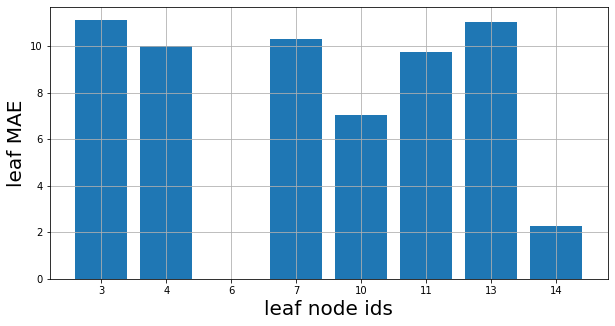

In [45]:
dts.show_leaf_regression_criteria()

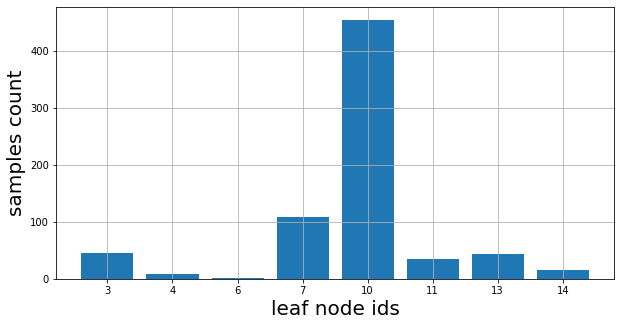

In [37]:
dts.show_leaf_samples()

In [40]:
dts.get_node_samples(3).describe()

,Pclass,Fare,Sex_label,Cabin_label,Embarked_label,Survived,Age
count,46.0,46.000000,46.000000,46.00000,46.000000,46.0,46.000000
mean,1.0,43.707335,0.978261,52.76087,1.478261,0.0,43.739130
std,0.0,26.174664,0.147442,49.37304,0.887922,0.0,13.278947
min,1.0,0.000000,0.000000,-1.00000,0.000000,0.0,21.000000
25%,1.0,26.550000,1.000000,0.25000,0.500000,0.0,29.250000
50%,1.0,35.250000,1.000000,45.50000,2.000000,0.0,45.000000
75%,1.0,59.856250,1.000000,98.00000,2.000000,0.0,54.000000
max,1.0,113.275000,1.000000,146.00000,2.000000,0.0,70.000000


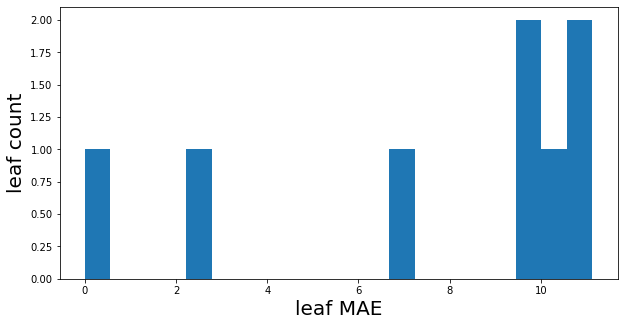

In [41]:
dts.show_leaf_regression_criteria_distribution(bins=20)


INFO - Make a prediction for sample [3, 7.8958, 1, -1, 2, 0]
INFO - decision path [ 0  8  9 10]


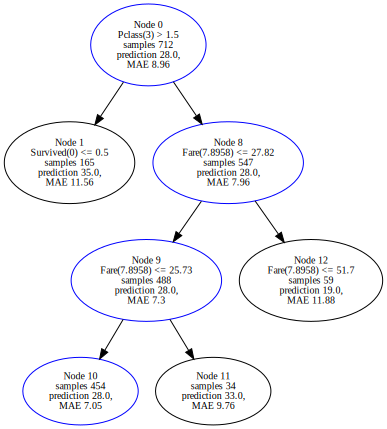

In [44]:
dts.show_decision_tree_prediction_path(list(train.iloc[0][features]))

In [68]:
dts.get_node_samples(node_id=11).describe()

,Pclass,Fare,Sex_label,Cabin_label,Embarked_label,Survived,Age
count,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2.0,26.256494,0.500000,3.176471,1.941176,0.500000,32.235294
std,0.0,0.579951,0.507519,24.352799,0.342997,0.507519,13.033892
min,2.0,26.000000,0.000000,-1.000000,0.000000,0.000000,2.000000
25%,2.0,26.000000,0.000000,-1.000000,2.000000,0.000000,26.250000
50%,2.0,26.000000,0.500000,-1.000000,2.000000,0.500000,33.000000
75%,2.0,26.000000,1.000000,-1.000000,2.000000,1.000000,42.000000
max,2.0,27.750000,1.000000,141.000000,2.000000,1.000000,54.000000
